# <center>  The Spam Detector </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk # un module spécialisé au traitement du texte

#from jyquickhelper import add_notebook_menu
#add_notebook_menu()
from jyquickhelper import add_notebook_menu

add_notebook_menu()

# I) Problématique 

Madame Esposito développe pour son entreprise un chatbot dans le but de répondre automatiquement à ses nombreux clients. Cependant son programme reçoit un grand nombre de message malveillant ou à caractère publicitaire ce qui dégrade les performance de son bot en plus d'occasionner des traitements informatique se répercutant sur sa facture d'électricité.

# II) Objectif 

créer un programme capable de détecter automatiquement les SPAM. La base de données mis à disposition est un jeux de donnée comportant un ensemble de SMS de type SPAM et NON SPAM (HAM), disponible à l'adresse suivante : 

http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

# III) Exploration des données

In [2]:
data = pd.read_csv("SMSSpamCollection.txt", sep="\t", header=None) # importation des données sous forme d'un tableau pandas
data # visualization du tableau

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


On remarque que les colones ne sont pas nommées. On opte pour le nommage des colonnes avec names=["category", "message"])

In [3]:
sms = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=["category", "message"])# mon tableau des données est maintenant mieux lisible

print(len(sms))
print(sms.info())
sms.head(10)

5572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Le sms est composé de plusieurs documents texte "message". Chaque document Texte est composées des phrases "sentenses"
Chaque phrase "Sentence" est composé des plusieurs mots "words" et des ponctuations "punctuation". Chaque document est cagtorisé en "spam" ou "ham" (non spam).


Afin de pouvoir classifier les documents de manière automatique par notre programme on binarise la colonne "catégorie" (on transforme les catégories en "0" et "1"). Dans la suite notre choix est d'accorder à "Spam" un "1" et à "ham" un "0"

In [4]:
# Notre binarisation à travers des fonctions pandas
sms['category'] = sms['category'].astype('category').cat.codes

print(len(sms))
print(sms.info())
sms.head(10)

5572
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   int8  
 1   message   5572 non-null   object
dtypes: int8(1), object(1)
memory usage: 49.1+ KB
None


,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


# IV) Prétraitement des données





Le traitement du langage naturel (TALN en français et NLPen anglais) est une branche de l'intelligence artificielle qui traite de l'interaction entre les ordinateurs et les humains en utilisant le langage naturel.

Les données générées à partir de conversations, de déclarations ou même de tweets sont des exemples de données non structurées. Les données non structurées ne s'intègrent pas parfaitement dans la structure traditionnelle de lignes et de colonnes des bases de données relationnelles et représentent la grande majorité des données disponibles dans le monde réel. C'est compliqué et difficile à manipuler. 

Une approche consiste à découper les documents en mots et compter le nombre des fois que chaque mot apparait dans le texte (ensemble des documents). Ce comptage sera aprés stockée dans une matrice aapelé "Bag of words".  


## IV-1) Vectorization
la vectorisation est le processus de conversion de texte en entrées numériques sous forme matricielle.
La matrice obtenue est appelée "Bag of words". Fondamentalement, il crée une matrice d'occurrence pour la phrase ou le document, sans tenir compte de la grammaire et de l'ordre des mots


## IV-2) Bag of words

C'est une matrice d'occurrence des mots dans l'ensemble des documents, sans tenir compte de la grammaire et de l'ordre des mots. Ces fréquences ou occurrences de mots sont ensuite utilisées comme fonctionnalités pour entraîner un classificateur.

## IV-3) Tokenization 

Est le processus de segmentation du texte courant en phrases et en mots. Il s’agit essentiellement de découper un texte en morceaux appelés jetons, et en même temps de jeter certains caractères, tels que la ponctuation.

## IV-4) Stops words
Certains mots très courants tels que des articles, des pronoms et des prépositions en langue courante comme  «et», «le» ou «à» semblent fournir peu ou aucun valeur à l'objectif de la NLP. Ces mots peu informatifs sont appelés "Stop_words". Ils sont généralement supprimés du texte.

La fonction suivante permet de nettoyer notre texte en le découpant en mots

In [5]:
import string 
import unicodedata
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()
def clean_title(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    title0 = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    title = re.split('\W+', title0)
    text = [ps.stem(word) for word in title if word not in nltk.corpus.stopwords.words('english')]
    return text

Aprés ce nettoyage, on opte pour la vectorization des mots obtenus pour générer la matrice de bag of words


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorize2 = CountVectorizer(analyzer=clean_title) 
bag_of_words2= count_vectorize2.fit_transform(sms["message"])
print(bag_of_words2.shape)

(5572, 8111)


In [7]:
feature_names2 = count_vectorize2.get_feature_names()
print(feature_names2)

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

La technique de classification utilisée dans la suite est la regression de logistique

In [8]:
## V-1) Split de nos données pour l'entrainement
# split 
from sklearn.model_selection import train_test_split
from collections import Counter

X=bag_of_words2
Y=sms['category']

print(X.shape)
print(Y.shape)
print(Counter(Y))

(5572, 8111)
(5572,)
Counter({0: 4825, 1: 747})


On réalise que la répartition des classes dans la base de données est déséquilibrée. En effet le nombre d'observations par classe peut n'est pas le même d'une classe à l'autre (c'est d'ailleurs le cas général en pratique). Il y a 4825 'ham' contre 747 'spam'.

On réalise que les labels ne sont pas équitablement présents dans notre base de données, il y a 4825 'ham' contre 747 'spam'. Afin de garantir un nombre suffisant de présence de deux catégories dans le set d'entrainement, on split avec le paramère 'stratify' (trés important).

Dans ce cas, pour éviter que la performance de validation (et d'apprentissage) ne soit biaisée par une répartition changeante des classes d'un ensemble de validation (resp. d'apprentissage) à un autre, il est recommandé d'utiliser un split stratifié. La stratification consiste à s'assurer que la répartition des classes soit la même dans tous les ensembles d'apprentissage et de validation utilisés. C'est-à-dire que si la base de données initiale présente, par exemple, 3 observations de la classe 1 pour 7 observations de la classe 2, alors chaque ensemble de validation (resp. d'apprentissage) devra présenter ce ratio de 3 pour 7.

En résumé le paramètre 'stratify' qui permet de s’assurer que les deux classes sont équitablement réparties entre les deux ensembles train et test.


In [9]:
# split into train test sets with stratify
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)
print(Counter(Y))
print(Counter(Y_train))
print(Counter(Y_test))

Counter({0: 4825, 1: 747})
Counter({0: 3859, 1: 598})
Counter({0: 966, 1: 149})


On passe maintenant à l'étape d'entrainement

In [10]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression()# the maximum of ietration to train is very important 
clr.fit(X_train, Y_train)

LogisticRegression()

on visualise la matrice de confusion


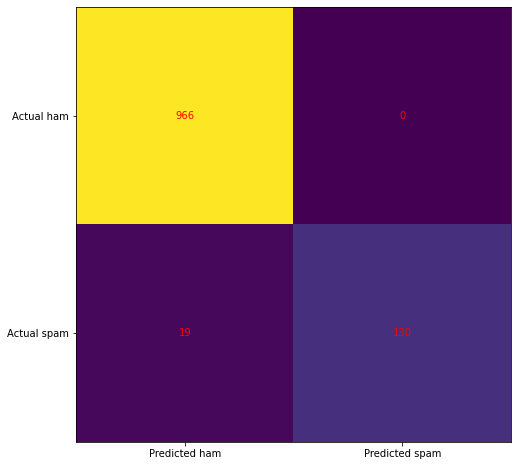

In [11]:
# plot an show of the 
from sklearn.metrics import confusion_matrix, classification_report
conf = confusion_matrix(Y_test, clr.predict(X_test))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted ham', 'Predicted spam'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual ham', 'Actual spam'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='red')
plt.show()

On présente ensuite notre rapport de classification


In [12]:
## rapport de la régression

report = classification_report(Y_test, clr.predict(X_test))
print('Le rapport de classification des émails:', report, sep='\n')

Le rapport de classification des émails:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Au lieu de spliter comme déjà préséntée avec split et startify on opte ici pour la cross-validation

## V-1) Cross-validation (La validation croisée)

Les avantages de la méthode de découpage aléatoire des données en un seul ensemble de données d'entrainement et un autre ensemble test sont:
- Simple
- facile et rapide à implémenter (puisque on entraine une seule fois et on test une seule pour obtenir un seul modèle)

Par contre cette méthode ne manque pas des inconvenients:

- L'erreur test (cette erreur sert à estimer l'erreur de prédiction) peut etre variable et dépendra du choix fixé du découpage des données

- L'erreur test peut sur-estimer l'errreur de prédiction (la vrai erreur calculée lors la phase de l'entrainement) en n'utilisant qu'une seule partie des données (avec un choix fixe) pour prédir la vrai fonction f (les relations existantes entre les données et la sortie (les labels)

Dans le cas d'insuffaisance des données (base de données non grandes) le fait de limiter l'ensemble des données d'entrainement peut générer dans tout les cas à une mauvaise prédiction

Généralement lorsqu'on parle de cross-validation (cv), l'on réfère à sa variante la plus populaire qu'est le k-fold cross-validation. Dans ce cas, nous profitons de toutes les données à disposition en les divisant en k parties égales (folds) sur lesquelles on entraîne et teste un modèle pendant k itérations. A chaque itération, le modèle est entrainé sur k-1 folds et est testé sur le fold restant.

Dans la suite teste la cross-validation avec sklearn

In [13]:
from sklearn.model_selection import cross_val_score
from time import perf_counter
from sklearn.model_selection import KFold
ACC=[]
for i in range(100):
    kf = KFold(n_splits=5,random_state=int(perf_counter ()*100),shuffle=True)
    acc = cross_val_score(estimator=clr, X=X_train, y=Y_train, cv=kf)
    ACC.append(acc)
ACC=np.array(ACC)
#print(ACC)
print('average score: {}'.format(ACC.mean()))
print('standard deviation score: {}'.format(ACC.std()))

average score: 0.9790600901893877
standard deviation score: 0.004826448422954714


In [14]:
print(acc)
print('average score: {}'.format(acc.mean()))
print('standard deviation score: {}'.format(acc.std()))

[0.98318386 0.97982063 0.98092031 0.98316498 0.9674523 ]
average score: 0.9789084165018395
standard deviation score: 0.005874013896460354


le plus gros avantage de la validation croisée est l'utilisation totale de nos données. Son inconvenient majeur est qu'il est un processus très lent et coûteux.

Si on veut maintenant utiliser une cross-validation stratifée on fait appel à StratifiedKFold

In [15]:
from time import perf_counter
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5, random_state=int(perf_counter ()*100), shuffle=True)

ACC=[]
for i in range(100):
    skf = StratifiedKFold(n_splits=5, random_state=int(perf_counter ()*100), shuffle=True)
    acc = cross_val_score(estimator=clr, X=X_train, y=Y_train, cv=skf)
    ACC.append(acc)
ACC=np.array(ACC)


In [16]:
print('average score: {}'.format(ACC.mean()))
print('standard deviation score: {}'.format(ACC.std()))

average score: 0.9791698625517758
standard deviation score: 0.00421853344075092


In [17]:
#print(ACC)

# VI) Conclusion et Perspectives

L'exemple étudié de détection du spam, nous montre une autre fois l'interet des techniques de machine leraning pour la résolution de ce problème appliqué à des données non structurés.
L'algorithme utilisé dans notre cas était la regression logistique, qui montre de trés bonnes résultats et scores.
Les prochaines étapes seront consacrés à essayer d"autres algorithmes telques le SVM, KNN.
